In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [44]:
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv('athlete_events.csv')

In [46]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [48]:
data.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
200869,100888,Donata Rimait,F,20.0,176.0,62.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Modern Pentathlon,Modern Pentathlon Women's Individual,NaN
194300,97547,Anita Punt-McLaren,F,28.0,163.0,56.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Women's Hockey,NaN
187342,94158,Biljana Petrovi (Bojovi-),F,27.0,176.0,60.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's High Jump,NaN
223503,112251,Fiamma G. Smith Mini,F,25.0,NaN,NaN,Guatemala,GUA,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN
48245,24864,Gunn Rita Dahle-Flesj,F,39.0,173.0,64.0,Norway,NOR,2012 Summer,2012,Summer,London,Cycling,"Cycling Women's Mountainbike, Cross-Country",NaN


In [49]:
data.shape

(271116, 15)

In [50]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [51]:
#filling missing values in age,height,weight

In [52]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [53]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [55]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [56]:
data.duplicated().sum()

np.int64(1385)

In [57]:
data[data.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,175.33897,70.702393,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [58]:
#removing the duplicates

In [59]:
data = data.drop_duplicates()

In [60]:
data.duplicated().sum()

np.int64(0)

In [61]:
data.shape

(269731, 15)

In [62]:
#correlation analysis

In [63]:
numerical_data = data.select_dtypes(include=['number'])

In [64]:
numerical_data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002825,-0.009791,-0.008059,0.011381
Age,-0.002825,1.000000,0.111115,0.168071,-0.088250
Height,-0.009791,0.111115,1.000000,0.786635,0.030126
Weight,-0.008059,0.168071,0.786635,1.000000,0.011598
Year,0.011381,-0.088250,0.030126,0.011598,1.000000


<Axes: >

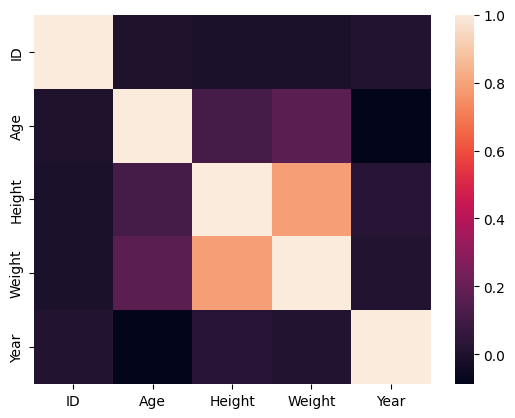

In [65]:
sns.heatmap(numerical_data.corr())

here darker color represents weaker relationship between 2 variable
where as ligher represents strong relationship

#univariate analysis
categorical data

In [66]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


1.distribution of athletes by gender(Sex)

In [67]:
data['Sex'].value_counts()

Sex
M    195353
F     74378
Name: count, dtype: int64

In [68]:
gen_dist = data['Sex'].value_counts()

In [69]:
gen_dist.index

Index(['M', 'F'], dtype='object', name='Sex')

In [70]:
gen_dist.values

array([195353,  74378])

<Axes: xlabel='Sex'>

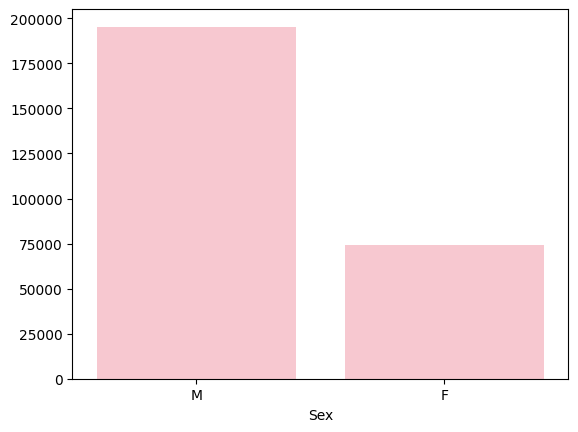

In [71]:
gen_dist = data['Sex'].value_counts()
sns.barplot(x = gen_dist.index , y = gen_dist.values, color = ('pink'))

In [72]:
#top 10 most popular sports based on athlete participation

In [73]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

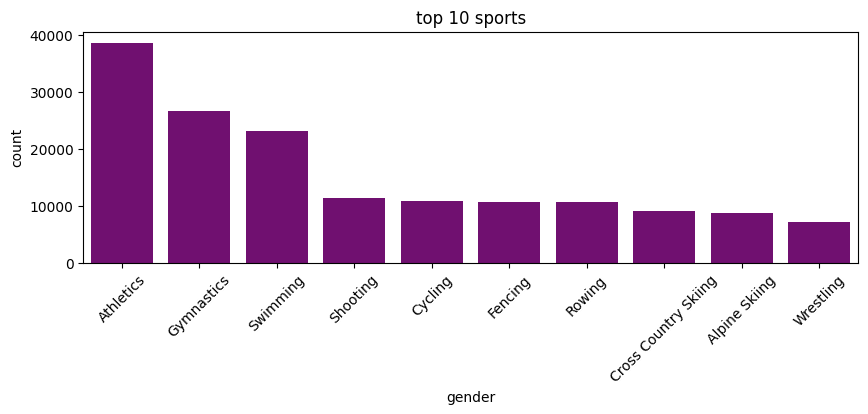

In [74]:
top = data['Sport'].value_counts().head(10)

plt.figure(figsize = (10,3))
sns.barplot( x = data['Sport'].value_counts().head(10).index, y = data['Sport'].value_counts().head(10).values, color = ('purple'))
plt.title("top 10 sports")
plt.xlabel("gender")
plt.ylabel("count")
plt.xticks(rotation = 45)
plt.show

<Axes: ylabel='count'>

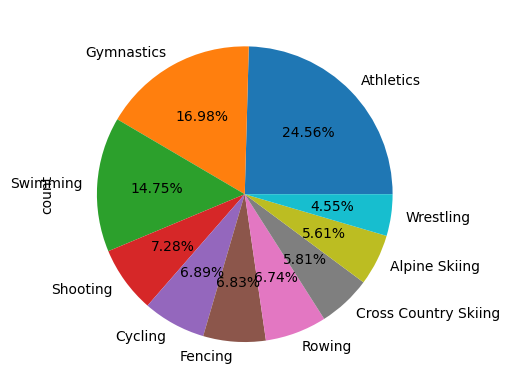

In [75]:
data['Sport'].value_counts().head(10).plot(kind = 'pie', autopct = "%1.2f%%")

In [76]:
#most popular sport on athlete participation

In [77]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [78]:
data['Sport'].value_counts().idxmax()

'Athletics'

In [79]:
data['Sport'].value_counts()

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10827
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

In [80]:
### numerical data

In [81]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [82]:
#checking ditribution of age

<Axes: xlabel='Age', ylabel='Count'>

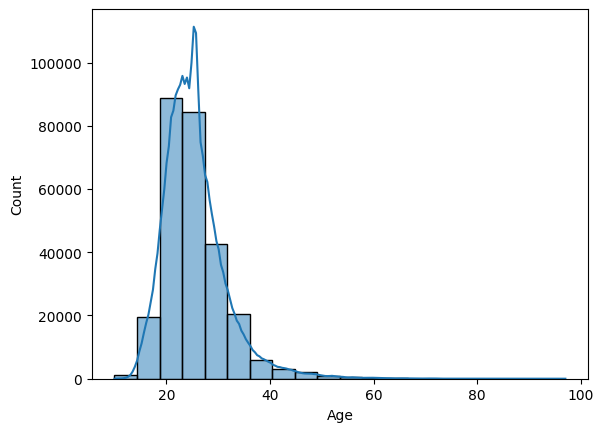

In [83]:
sns.histplot(data['Age'], bins = 20, kde = True)

<Axes: xlabel='Age'>

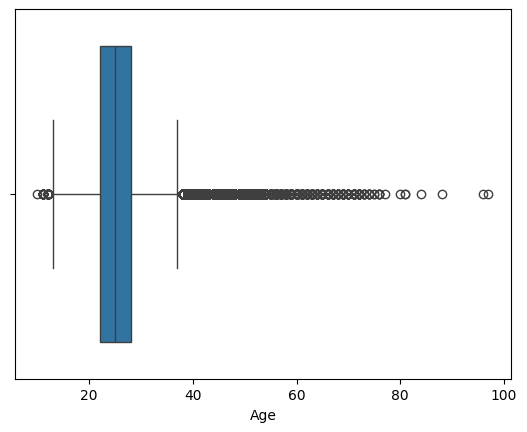

In [84]:
sns.boxplot(x = data['Age'])

In [85]:
data.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.458303,175.338957,70.701918,1978.623073
std,39026.253843,6.056530,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338970,70.702393,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [86]:
data['Age'].skew()

np.float64(1.5877141959478505)

section 3: Bivariated analysis & multivariate analysis

In [87]:
#1. numerical - numerical relationship

In [88]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


<Axes: xlabel='Age', ylabel='Height'>

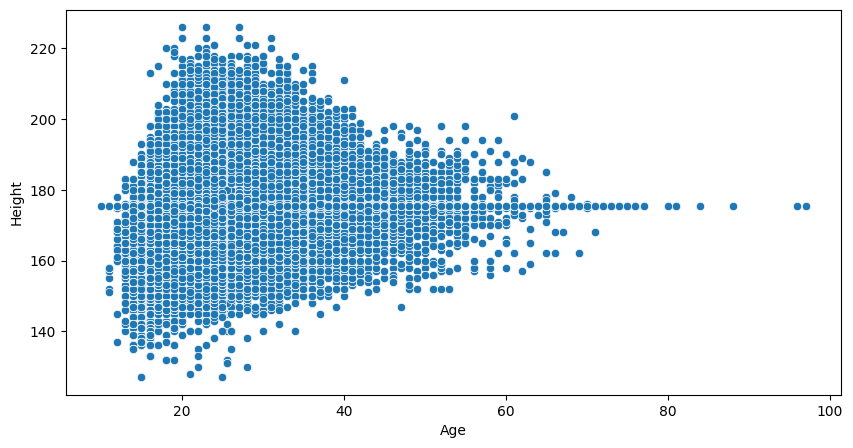

In [92]:
#scatter plot
plt.figure(figsize = ( 10, 5))
sns.scatterplot(x = 'Age', y = 'Height', data=data)

<Axes: xlabel='Age', ylabel='Height'>

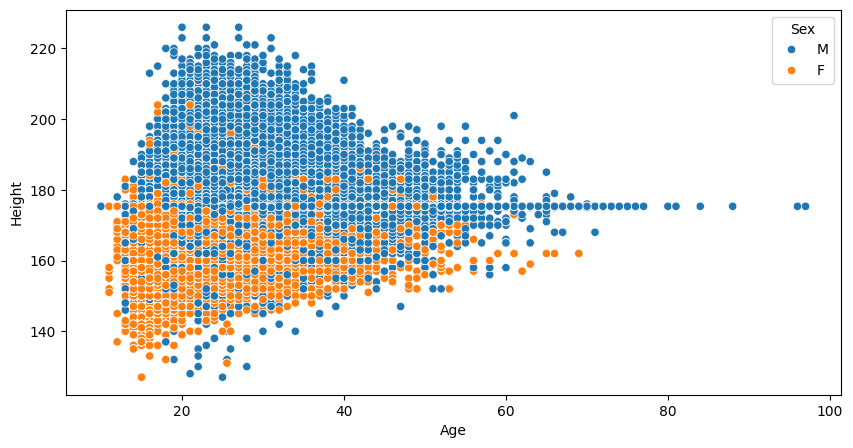

In [94]:
plt.figure(figsize = (10,5))
sns.scatterplot( x = 'Age', y = 'Height', hue= 'Sex', data=data)

In [95]:
#2.numerical - categorical relationship

In [96]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


<Axes: xlabel='Medal', ylabel='Age'>

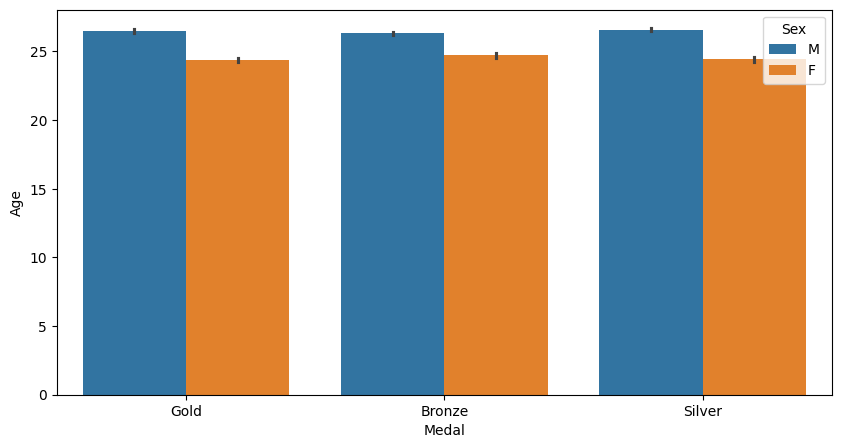

In [100]:
plt.figure(figsize = (10,5))
sns.barplot( x = 'Medal', y = 'Age', data=data, hue='Sex') 

<Axes: xlabel='Age', ylabel='Medal'>

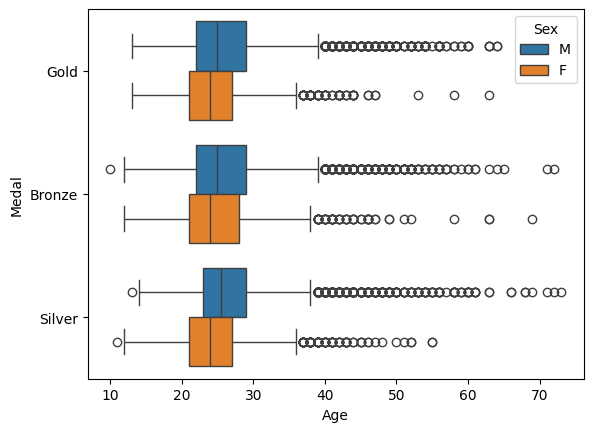

In [99]:
sns.boxplot(x='Age', y='Medal',data=data, hue='Sex')

In [119]:
# dsiplay top 10 atheletes by medal

In [120]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [126]:
medal_counts=data['Name'].value_counts().reset_index()

In [128]:
medal_counts.columns = ['Athlete', 'medal_count']

<Axes: xlabel='medal_count', ylabel='Athlete'>

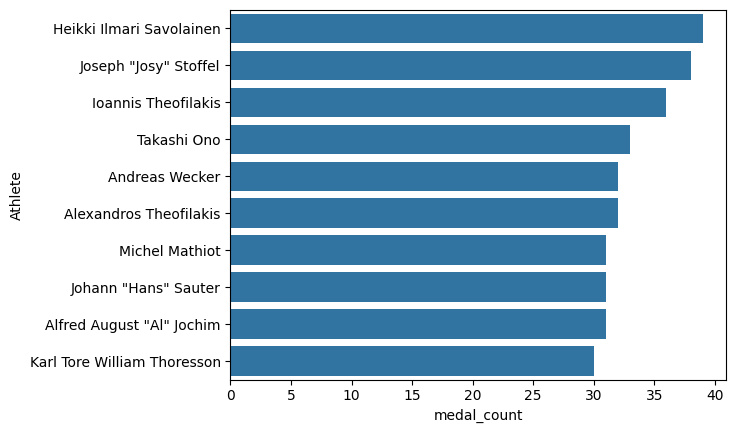

In [131]:
sns.barplot(x = 'medal_count', y='Athlete', data=medal_counts.head(10))

In [101]:
#3.categorical- categorical relationship

In [102]:
con = pd.crosstab(data['Sex'],data['Medal'])

In [103]:
con

Medal,Bronze,Gold,Silver
Sex,,,
F,3771,3747,3735
M,9524,9622,9373


<Axes: xlabel='Medal', ylabel='Sex'>

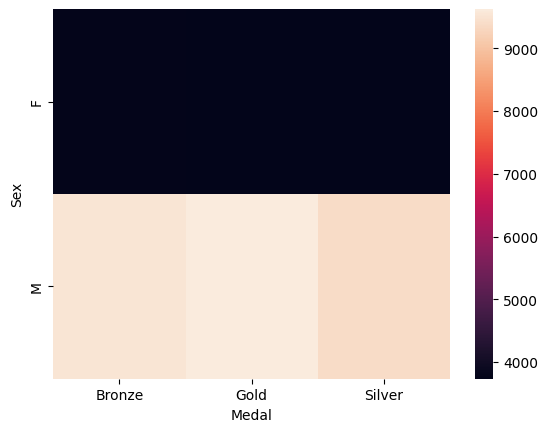

In [104]:
sns.heatmap(con)

numerical to numerical relationahip

In [106]:
# medal performance for a specific country per year

In [107]:
data.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [111]:
df_india = data[data['Team'] == 'India']

In [114]:
india_medal = df_india.groupby('Year')['Medal'].count()

In [117]:
india_medal.values

array([ 2,  0,  7, 14, 15, 19, 20, 15, 17, 13, 15, 16, 14,  0, 16,  0,  0,
        0,  1,  0,  1,  0,  1,  0,  3,  0,  6,  0,  2])

<Axes: xlabel='Year'>

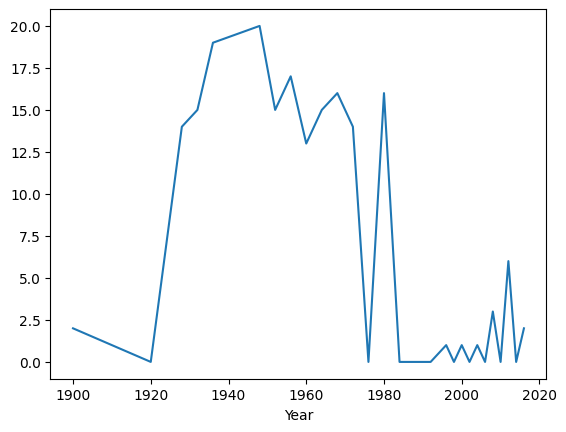

In [118]:
sns.lineplot( x = india_medal.index, y = india_medal.values)